Заведем системные функции и константы

In [331]:
import numpy as np
import matplotlib.pyplot as plt

In [332]:
N_GRAPH = 1000

In [333]:
def get_xs(xl, xr, n):
    s = (xr - xl) / (n - 1)
    return np.arange(xl, xr + 10 ** -9, s)

In [334]:
def get_diff(xs, f1, f2):
    return list(map(lambda x: abs(f1(x) - f2(x)), xs))

In [335]:
def draw(xs, ys, names=None):
    if type(xs) is not list:
        xs = [xs]
        ys = [ys]
        if names is not None:
            names = [names]
            
    n = len(xs)
    for i in range(n):
        plt.plot(xs[i], ys[i])
        
    if names is not None:
        plt.legend(names)
    plt.show()

# Упражнение 1

Введем обозначения:

$x_a = x_0 - \frac{h}{a}$, $x_a = x_0$, $x_a = x_0 + ha$

Запишем формулу производной с первыми двумя параметрами:

$p'(x) = [x_a, x_b]f + [x_a, x_b, x_c]f*(x - x_a + x - x_b)$

Тогда:

$f'(x_0) \sim p'(x_c) = \frac{f(x_b) - f(x_a)}{x_b - x_a} + \frac{\frac{f(x_c) - f(x_a)}{x_c - x_a} - \frac{f(x_b) - f(x_a)}{x_b - x_a}}{x_c - x_b} (x_b - x_a) = \frac{y_b - y_a}{\frac{h}{a}} + \frac{\frac{y_c - y_a}{ah + \frac{h}{a}} - \frac{y_b - y_a}{\frac{h}{a}}}{ah} \frac{h}{a} = \frac{1}{h} ((y_b - y_a)(a - \frac{1}{a}) + \frac{y_c - y_a}{a^3 + a})$

In [336]:
def f(x):
    return np.sin(x)

def df(x):
    return np.cos(x)

def df_approx(x_s, a, h):
    xa = x_s - h / a
    xb = x_s
    xc = x_s + h * a
    
    ya, yb, yc = f(xa), f(xb), f(xc)
    
    return 1 / h * ((yb - ya) * (a - 1 / a) + (yc - ya) / (a ** 3 + a))

def get_df_error(x0, a, hl, hr):
    hs = get_xs(hl, hr, N_GRAPH)
    diffs = get_diff(hs,
            lambda h: df(x0),
            lambda h: df_approx(x0, a, h))
    
    return hs, diffs

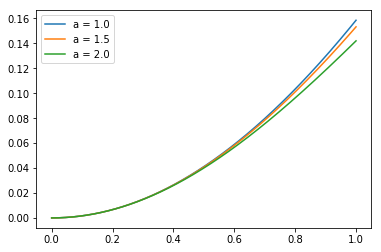

In [337]:
x0 = 0
hl = 10 ** -8
hr = 1

xs, ys, names = [], [], []
for a in np.arange(1, 2 + 10 ** -9, 0.5):
    hs, diffs = get_df_error(x0, a, hl, hr)
    xs.append(hs)
    ys.append(diffs)
    names.append("a = " + str(a))

draw(xs, ys, names)

Теоретическая оценка точности $O(a^2 h^2)$. Это сходится с полученными результатами - графики функции выглядят, как параболы. 

# Упражнение 2

## Пункт A

In [338]:
def f(x):
    return 1 / (1 + 9 * x ** 2)

def primitive(x):
    return 1 / 3 * np.arctan(3 * x)

def integral(a, b):
    return primitive(b) - primitive(a)

In [339]:
def int_trapeze(f, a, b, n):
    dx = (b - a) / n
    S = sum(f(a + dx * i) for i in range(n)) - f(a) / 2 + f(b) / 2
    return S * dx

In [340]:
def int_simpson(f, a, b, n):
    dx = (b - a) / n
    S = sum(2 * f(a + dx * i) + 4 * f(a + dx * i + dx / 2) for i in range(n)) - f(a) + f(b)
    return S * dx / 6

In [341]:
a = -1
b = 5

nl = 2
nr = 1000

ns = np.array(list(range(nl, nr)))

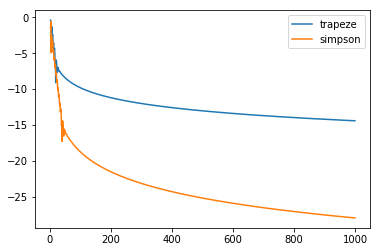

In [342]:
diffs_trapeze = get_diff(ns,
        lambda n: integral(a, b),
        lambda n: int_trapeze(f, a, b, n))

diffs_simpson = get_diff(ns,
        lambda n: integral(a, b),
        lambda n: int_simpson(f, a, b, n))

diffs_trapeze_log = list(map(lambda x: np.log(x), diffs_trapeze))
diffs_simpson_log = list(map(lambda x: np.log(x), diffs_simpson))

xs = [ns] * 2
ys = [diffs_trapeze_log, diffs_simpson_log]
names = ["trapeze", "simpson"]

draw(xs, ys, names)

В логарифмической шкале значения отличаются примерно в 2 раза. Что согласуется с теорией, так как метод трапеции имеют оценку $O(1 / M^2)$, а метод Симпсона $O(1 / M^4)$.

## Пункт B

In [343]:
a = -1
b = 5

eps = 10 ** -6

def H_runge(f, a, b, eps):
    H2 = 10 ** -3
    H1 = 2 * H2
    SH2 = int_trapeze(f, a, b, int((b - a) / H2))
    SH1 = int_trapeze(f, a, b, int((b - a) / H1))
    C = 1 / (3 * H2 ** 2) * (SH2 - SH1)
    return np.sqrt(eps / abs(C))

def H_real(f, a, b, eps):
    real_v = integral(a, b)
    
    l = 0
    r = 1
    for i in range(100):
        m = (l + r) / 2
        v = int_trapeze(f, a, b, int((b - a) / m))
        if (abs(real_v - v) < eps):
            l = m
        else:
            r = m
            
    return l
        

H_a = H_runge(f, a, b, eps)
H_r = H_real(f, a, b, eps)

print("Runge =", H_a)
print("real =", H_r)
print("difference =", abs(H_r - H_a))

Runge = 0.008125295008320198
real = 0.008119079837618403
difference = 6.2151707017951e-06


## Пункт C

In [344]:
a = -1
b = 1

In [345]:
def get_weights(a, b, n):
    def gen_f(i):
        def f(q):
            res = 1
            for k in range(1, n + 1):
                if k != i:
                    res *= q - (k - 1)
            return res
        return f
    
    h = (b - a) / (n - 1)
    arr = []
    for i in range(1, n + 1):
        l = int_simpson(gen_f(i), 0, n - 1, N_GRAPH)
        l *= (-1) ** (n - i) * h / np.math.factorial(i - 1) / np.math.factorial(n - i) 
        arr.append(l)
    return arr

In [346]:
n = 2
while min(get_weights(a, b, n)) > 0:
    n += 1
    
print("the minimum number of nodes for which the weight is negative =", n)

the minimum number of nodes for which the weight is negative = 9
